## 1) Generujte rovnoměrně body do kruhu o poloměru R, za použití parametrů r a fi ( metoda inverzní funkce, p(r) = 2r/R^2 , p(fi) = 1/(2pi) )

1) Nejjednodusim zpusobem generovani bodu v kruznici je vzorkovani s odchylkou (rejektion sampling), generugeme budy v ctvrce, vsechny body co nejsou v kruhu - odmitame. 

2) Vic efektivni zpusob pouzivat polarni souradnici kde bod je definovan radiusem a uhlem (fi<0, 2pi> r<0,r>)- ale v dusledku takoveho generovani boudy jsou mnohem hustsi ve stredu kruhu. Protoze rand generatoe ma rovnomernou distribuce(rozlozeni), kazdy kruh uvnitr kruhu bude obsahovat v prumeru stejny pocet bodu. Cim vetsi kruh tim u jeho okraje metsi hustota

#### 1)

In [4]:
import random
import matplotlib.pyplot as plt

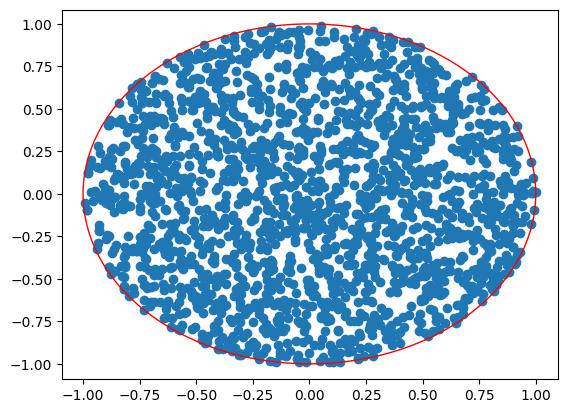

In [24]:
import matplotlib.pyplot as plt
def vzorkovani_s_odhylkou(pocet_kroku, r):
    x_body = []
    y_body = []
    for i in range(1, pocet_kroku):
        x = random.random() * 2 - r
        y = random.random() * 2 - r
        if x * x + y * y <= r:
            x_body.append(x)
            y_body.append(y)
    return x_body, y_body
        
x,y = vzorkovani_s_odhylkou(2500, 1)
kruh  = plt.Circle((0,0), 1, color='r', fill=False)

fig, ax = plt.subplots()
plt.scatter(x,y)
ax.add_artist(kruh)
plt.show()


#### 2)

In [12]:
import math

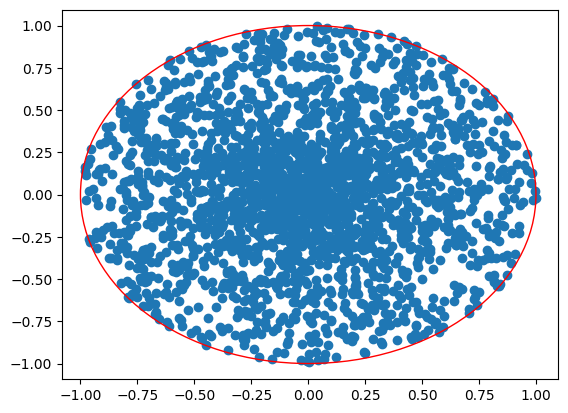

In [23]:
def polar_sour():
    fi = random.random() * 2 * math.pi
    r = random.random() # od 0 do 1
    return r * math.cos(fi), r * math.sin(fi)

pocet_kroku = 2500
cos_slozka = []
sin_slozka = []

for i in range(pocet_kroku):
    x, y = polar_sour()
    cos_slozka.append(x)
    sin_slozka.append(y)

kruh  = plt.Circle((0,0), 1, color='r', fill=False)

fig, ax = plt.subplots()
plt.scatter(cos_slozka,sin_slozka)
ax.add_artist(kruh)
plt.show()

muzeme popsat vyber radiusu pomoci f-ci hustoty pravdepodobnosti (PDF, probability density function) - pravdepodobnost ze bod se objevi na danem intervalu, tento graf je horizontqlni primka r<0,r>, protoze pravdepodobnost hodnoty r je stejna.
PDF nam nevyhovuje - nejit f-ce pro rovnomernou distribuci bodu na kruznice.

PDF - musi byt lunearni f(r) = n*r (n - nejake nakloneni)
*pravdepodobnost ze r bude <0,1> = 1, stejne integral nebo ploha pod krivkou f-ce  bude <0,1> a P = 1 => obr => n = 2 a f(r) = 2r

Ted musime najit transformace, pri aplikace ktereho na rovnomerne rozlozeni dostaneme linearni rozlozeni. Funkce rozlozeni (CFD) F(r) kde se jedna o integrovany PDF = > F(x) = ∫(0,r)  f(x) dx = ∫(0,r) 2x dx = r^2  (P(x<=r))

Pomoci CFD muzeme pouzit metodu zpetne transformace ktery se pouziva pro transformaci rovnomerneho rozlozeni nahodnych cisel, tak aby oni odpovidali potrebnemu rozlozeni. 1) generuje se nahodne cislo s rovnomernym rozlozenim  2) toto cislo je argumentem ve f-ce zpetneho rozlozeni(CDF), abychom dostali hodnotu odpovidajici potrebnemu rozlozeni. F(r) = P(x <= r)

CFD - oznacuje pravdepodobnost ze nahodna promena "x" bude <= argumentu f-ce "r"
1) PDF - f-ce hustoty pravdepodobnosti = r^2
2) CFD = ∫pdf = r
3) Metoda zpetne transformaci se aplikuje na ravnomerno rozlozenou nahodnou promenou, s pouzivanim zpetne f-ce CFD. Zpetna d-ce CFD pro kruznici = sqrt(r)

obr

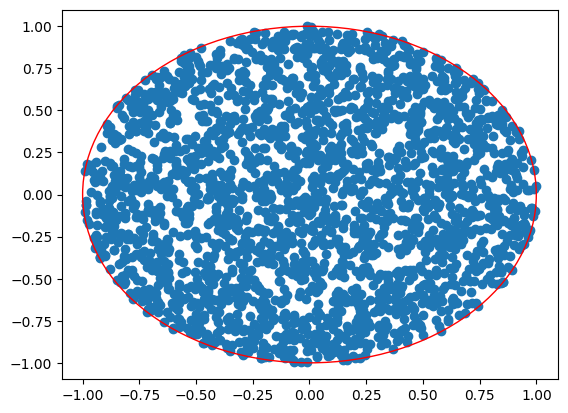

In [26]:
import math # pro R = 1
def rozlozeni():
    fi = random.random() * 2 * math.pi
    r = math.sqrt(random.random())
    return r * math.cos(fi), r * math.sin(fi)

pocet_kroku = 2500
cos_slozka = []
sin_slozka = []

for i in range(pocet_kroku):
    x, y = rozlozeni()
    cos_slozka.append(x)
    sin_slozka.append(y)

kruh  = plt.Circle((0,0), 1, color='r', fill=False)

fig, ax = plt.subplots()
plt.scatter(cos_slozka,sin_slozka)
ax.add_artist(kruh)
plt.show()
    

### Resenni ulohy

1) urcime f-ci hustoty pravdepodobnosti p(r) jako 2r / R^2
Integrujeme ji abychom dostali CFD: F(r) = r^2 / R^2

2) Inverzni funkce k F(r) bude F(u)^-1 = R * sqrt(u)    (u - rovnomerne rozlozene nahodne cislo <0,1>)

3) p(fi) = 1/2pi => CFD: F(fi) = ∫(0 fi) p(fi) = ∫ 1/2pi = fi/2pi

fi = F(fi) *  2pi -> fi = F(v) * 2pi ->   F(Vv) = 2PI * v

4) Generujeme nahodne cislo "u" pro radius a nahod cislo "v" pro uhel, pak pozivame inverzni f-ce pro radius a primou transformaci pro uhel : 

r= R* sqrt(u); fi = 2pi * v

5) Dostavame koordinaty x= r* cos(fi), y = r* sin (fi)

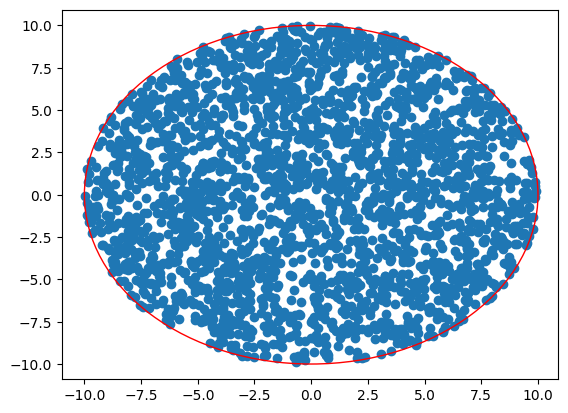

In [29]:
def inverzni_transformace(R):
    r = R * math.sqrt(random.random())
    fi = random.random() * 2 * math.pi
    x = r * math.cos(fi)
    y = r * math.sin(fi)
    return x,y

pocet_kroku = 2500
radius_kruznice = 10
x = []
y = []

for i in range(pocet_kroku):
    cos, sin = inverzni_transformace(radius_kruznice)
    x.append(cos)
    y.append(sin)

kruh  = plt.Circle((0,0), radius_kruznice, color='r', fill=False)

fig, ax = plt.subplots()
plt.scatter(x,y)
ax.add_artist(kruh)
plt.show()
